<a href="https://colab.research.google.com/github/6yuvaldavid/navie-bayes/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

11501568/11490434 [==============================] - 0s 0us/step


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
we can use the smoothing technique (Laplace correction) for edge cases (for example, a high pixel in the image for some class that never occurred before).

classification rule:

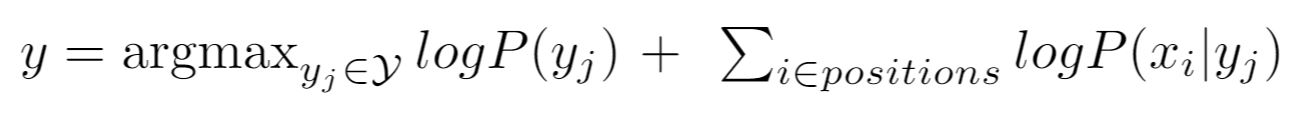



#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

In [ ]:
#@title Default title text
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(binarize=0.)
clf.fit(x_train, y_train)

BernoulliNB()

======0======


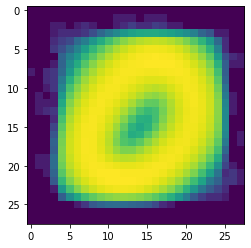

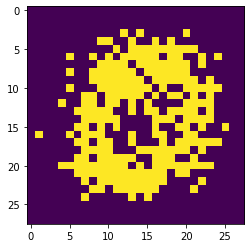

======1======


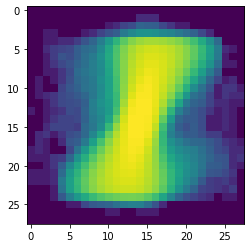

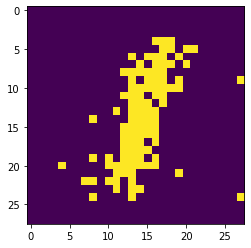

======2======


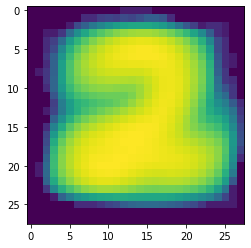

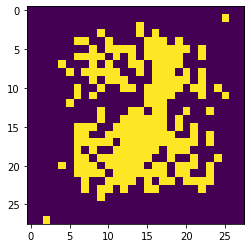

======3======


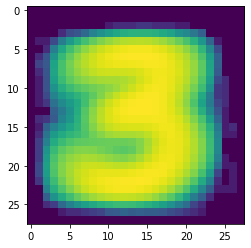

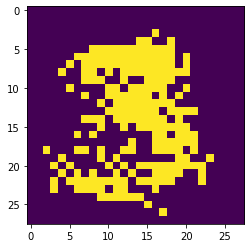

======4======


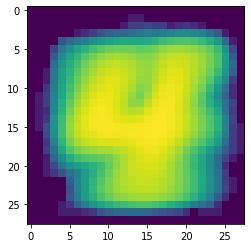

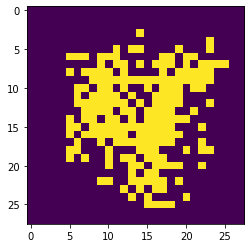

======5======


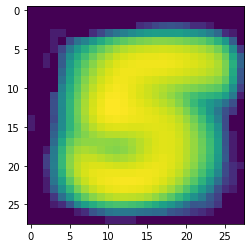

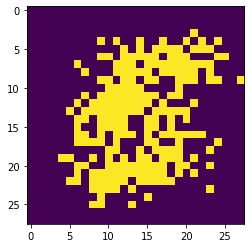

======6======


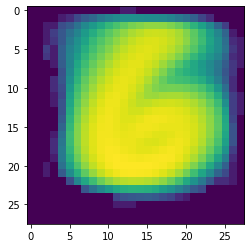

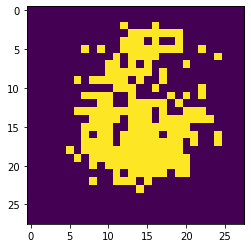

======7======


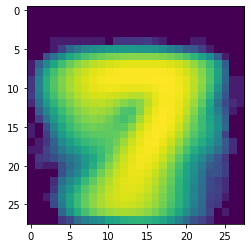

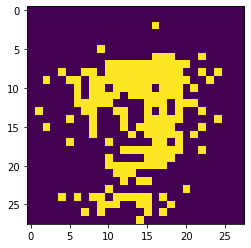

======8======


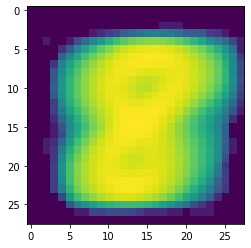

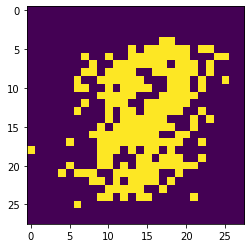

======9======


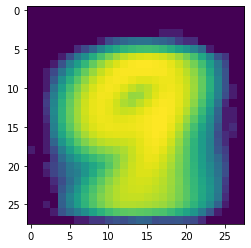

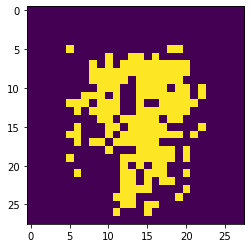

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for digit, vec_digit in enumerate(clf.feature_log_prob_):
  print(f'======{digit}======')
  reshape_vec = vec_digit.reshape(28,28)
  plt.imshow(reshape_vec)
  plt.show()
  generated = np.random.binomial(1,np.power(2, reshape_vec))
  plt.imshow(generated)
  plt.show()

confusion_matrix:
[[ 887    0    4    7    2   41   16    1   22    0]
 [   0 1085   10    5    0    9    6    0   19    1]
 [  19    8  852   29   17    4   32   14   55    2]
 [   5   15   34  844    0   13    9   15   49   26]
 [   2    6    4    0  795    4   21    1   23  126]
 [  23   12    7  129   30  627   16    8   21   19]
 [  18   18   15    2   13   35  851    0    6    0]
 [   1   24   14    4   15    0    0  871   27   72]
 [  16   23   13   76   17   22    7    6  758   36]
 [   9   13    5    9   74    8    0   24   24  843]]


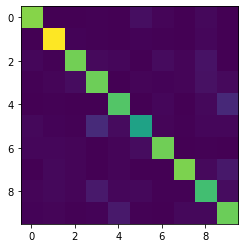

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'confusion_matrix:\n{conf_matrix}')
plt.imshow(conf_matrix)
plt.show()

3. We can do grid search for diffrents threshold (0.4,0.45,0.5,0.55,0.6) and then take the best threshold based on f1 score.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class NaiveBayes(BaseEstimator, ClassifierMixin):
# '''
# BaseEstimator and ClassifierMixin are imported from sklearn.base
# '''
  def fit(self, x, y):
    num_class = np.unique(y, axis=0).shape[0]
    num_features = x.get_shape()[1]
    prior_class = np.ones((num_class, 1))
    prior_features = np.zeros((num_features, 1)) + 1.0
    matrix = np.zeros((num_features, num_class)) + 1.0
    for idx_x, x_i in enumerate(x):
        label = y[idx_x]
        x_i_indices = x_i.indices
        prior_class[label] += 1
        for idx_j, j_i in enumerate(x_i_indices):
            matrix[j_i][label] += x_i.data[idx_j]
            prior_features[j_i] += x_i.data[idx_j]
            # total_words  += x_i[idx_j]
    matrix = matrix/ matrix.sum(axis=0,keepdims=1)
    self.n_class = num_class
    self.matrix =np.log(matrix)
    self.prior_class = np.log(prior_class/ prior_class.sum(axis=0))
    self.prior_features = np.log(prior_features)
    return self
  def predict_log_proba(self, x):
     predict_matrix = []
     for idx, x_i in enumerate(x):
       results_prob = np.sum((self.matrix[x_i.indices].T * x_i.data).T, axis=0).reshape((20, 1)) +  self.prior_class
       predict_matrix.append(results_prob)

     return np.squeeze(predict_matrix)

  def predict(self, x):
    results = self.predict_log_proba(x)
    return results.argmax(axis=1)

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))
vectorizer = CountVectorizer()
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# sklearn model
print('\nsklearn model flow')
pipline = make_pipeline(vectorizer, MultinomialNB())
print('Start fit')
pipline.fit(newsgroups_train.data, y_train)
print('Start predict')
y_test_predict = pipline.predict(newsgroups_test.data)
print(classification_report(y_test, y_test_predict))
score = pipline.score(newsgroups_test.data, y_test)
print("score")
print(score)



sklearn model flow
Start fit
Start predict
              precision    recall  f1-score   support

           0       0.65      0.15      0.25       319
           1       0.63      0.60      0.62       389
           2       0.33      0.00      0.01       394
           3       0.54      0.66      0.60       392
           4       0.82      0.42      0.55       385
           5       0.53      0.81      0.64       395
           6       0.88      0.55      0.68       390
           7       0.85      0.54      0.66       396
           8       0.95      0.40      0.57       398
           9       0.97      0.56      0.71       397
          10       0.57      0.78      0.66       399
          11       0.40      0.79      0.53       396
          12       0.70      0.38      0.49       393
          13       0.82      0.67      0.74       396
          14       0.73      0.64      0.68       394
          15       0.32      0.93      0.47       398
          16       0.60      0.43    

In [ ]:
# our model
print('\nour model flow')
our_pipline = make_pipeline(vectorizer, NaiveBayes())
print('Start fit')
our_pipline.fit(newsgroups_train.data, y_train)
print('Start predict')
y_test_predict = our_pipline.predict(newsgroups_test.data)
print(classification_report(y_test, y_test_predict))
our_score = our_pipline.score(newsgroups_test.data, y_test)
print('our_score')
print(our_score)


our model flow
Start fit
Start predict
              precision    recall  f1-score   support

           0       0.65      0.15      0.25       319
           1       0.63      0.60      0.62       389
           2       0.33      0.00      0.01       394
           3       0.54      0.66      0.60       392
           4       0.82      0.42      0.55       385
           5       0.53      0.81      0.64       395
           6       0.88      0.55      0.68       390
           7       0.85      0.54      0.66       396
           8       0.95      0.40      0.57       398
           9       0.97      0.56      0.71       397
          10       0.57      0.78      0.66       399
          11       0.40      0.79      0.53       396
          12       0.70      0.38      0.49       393
          13       0.82      0.67      0.74       396
          14       0.73      0.64      0.68       394
          15       0.32      0.93      0.47       398
          16       0.60      0.43      0.

In [ ]:
# ---------------using TfidfVectorizer-------------------- 
print('\nTfidfVectorizer flow')
vectorizer_tf = TfidfVectorizer()
X_tf = vectorizer_tf.fit_transform(newsgroups_train.data)
pipline_tf = make_pipeline(vectorizer_tf, MultinomialNB())
print('Start fit')
pipline_tf.fit(newsgroups_train.data, y_train)
print('Start predict')
y_test_predict = pipline_tf.predict(newsgroups_test.data)
print(classification_report(y_test, y_test_predict))
tf_score = pipline_tf.score(newsgroups_test.data, y_test)
print('tf_score:')
print(tf_score)



TfidfVectorizer flow
Start fit
Start predict
              precision    recall  f1-score   support

           0       0.81      0.07      0.13       319
           1       0.72      0.62      0.67       389
           2       0.70      0.50      0.59       394
           3       0.55      0.75      0.64       392
           4       0.81      0.61      0.69       385
           5       0.83      0.74      0.78       395
           6       0.86      0.69      0.77       390
           7       0.82      0.68      0.74       396
           8       0.89      0.63      0.73       398
           9       0.95      0.69      0.80       397
          10       0.59      0.90      0.71       399
          11       0.47      0.80      0.59       396
          12       0.77      0.43      0.55       393
          13       0.86      0.63      0.73       396
          14       0.84      0.63      0.72       394
          15       0.22      0.95      0.36       398
          16       0.59      0.59  

In [ ]:
# ---------------using optimize-------------------- 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

print('\noptimize flow')
vectorizer_tf = TfidfVectorizer(max_features=9000, strip_accents = 'ascii')
pipline_optimize = Pipeline(steps=[("tf", vectorizer_tf), ("naive", NaiveBayes())])
param_grid = {
    "tf__strip_accents": ['ascii', 'unicode'],
    "tf__stop_words" : ['english'],
    "tf__max_features": np.arange(7000,12000,1000),
}
print('Start fit')
search = GridSearchCV(pipline_optimize, param_grid, n_jobs=-1)
search.fit(newsgroups_train.data, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print('Start predict')
optimize_score = search.score(newsgroups_test.data, y_test)
print('optimize_score:')
print(optimize_score)


optimize flow
Start fit
Best parameter (CV score=0.713):
{'tf__max_features': 11000, 'tf__stop_words': 'english', 'tf__strip_accents': 'ascii'}
Start predict
optimize_score:
0.6776420605416887


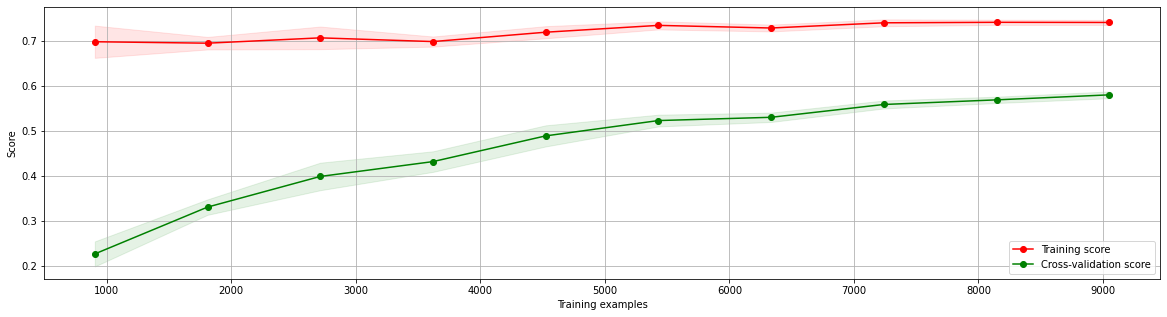

In [ ]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

newsgroups_all = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
X = newsgroups_all.data
y = newsgroups_all.target

_, axes = plt.subplots(1, 1, figsize=(20, 5))
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")


train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        our_pipline,
        X,
        y,
        cv=5,
        n_jobs=4,
        train_sizes=np.linspace(0.1, 1.0, 10),
        return_times=True,
    )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
)
axes.legend(loc="best")


it seems as we are very close to the optimal solution since the error goes down on the validation so the variance is starting to go upwards and the bias is going down, we are still not overfitting since the validation error is still decreasing



### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color = '\x1b[43;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other wordother', ['word'],['other'])

This word support the first class but this the other wordother


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Implementationn for 1st bonus
def calc_p_c_given_xi(model):
  # p(c|xi)=p(c)p(xi|c)/p(xi)
  class_log_prior = model.class_log_prior_
  class_prior = np.exp(class_log_prior).T
  feature_log_prob = model.feature_log_prob_
  feature_prob = np.exp(feature_log_prob)
  feature_count = model.feature_count_
  feature_count = feature_count.sum(axis=0,keepdims=1)
  feature_count = feature_count / feature_count.sum()
  p_c_given_xi = (feature_prob.T*class_prior).T / feature_count
  # p_c_given_xi = np.argmax((feature_prob.T*class_prior).T , axis=1)

  return p_c_given_xi

newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))
vectorizer = CountVectorizer(strip_accents = 'unicode',decode_error='ignore',min_df = 10)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target
sklearn_clf = MultinomialNB()
sklearn_clf.fit(vectors_train, newsgroups_train.target)
p_c_given_xi = calc_p_c_given_xi(sklearn_clf)
y_train_prediction = sklearn_clf.predict(vectors_train)
args = np.argwhere(y_train_prediction!=y_train)
error_number = args[9]
error_example = newsgroups_train.data[int(error_number)]

ind_error = np.argpartition(p_c_given_xi[y_train_prediction[error_number]], -20)[-20:]
ind_correct = np.argpartition(p_c_given_xi[y_train[error_number]], -20)[-20:]
most_important_features_error = np.take(vectorizer.get_feature_names(), ind_error)
most_important_features_correct = np.take(vectorizer.get_feature_names(), ind_correct)
# for class_idx,feature_idx  in enumerate(p_c_given_xi):
# most_important_features = np.take(vectorizer.get_feature_names(), int(feature_idx))
# print(f'most_important_features for {class_idx} is: {most_important_features}')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print_txt(error_example, most_important_features_error, most_important_features_correct)


Funny you should mention this; one time on HNIC Don Cherry pointed out
Vanbiesbrouck's mask.  He _hated_ it.  I think he said something to the effect
of:
"You see?  He was great last year; now he goes out and gets that dopey mask 
and he can't stop a beachball!"

You may or may not take Cherry seriously at all, but I cracked up when I heard
it.


### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why


I think that the main problem for all the mistakes is that the classes top words are very smiliar, so maybe we should cluster the similar classes and do a test between clusters- after determinating the correct cluster